# Derivados Financieros 2021 - Clase 5
## Otros modelos de pricing - QuantLib

    0) PnL Explanation
  

$$ PnL(hoy) = C(hoy)- C(ayer) = $$

$$ PnL(t=1) = C(t=1)- C(t=0) = dC(t=0) = \frac{dC}{dt}(t=0) $$

$$  \frac{dC}{dt}(t=0) =  \frac{\partial C}{\partial S}(t=0)  \frac{dS}{dt}(t=0) +  \frac{\partial C}{\partial \tau}(t=0)  \frac{d\tau}{dt}(t=0) + \frac{\partial C}{\partial \sigma}(t=0)  \frac{d\sigma}{dt}(t=0) + \frac{1}{2} \frac{\partial C}{\partial S^2}(t=0)  \left(\frac{dS}{dt}(t=0)\right)^2 \cdots $$

$$  PnL =  \frac{\partial C}{\partial S}  dS +  \frac{\partial C}{\partial \tau}  d\tau+ \frac{\partial C}{\partial \sigma}  d\sigma + \frac{1}{2} \frac{\partial C}{\partial S^2} \left(dS\right)^2 + \cdots $$


$$  PnL (hoy) =  \Delta (ayer) (S(hoy)-S(ayer)) +  \Theta(ayer)  + Vega(ayer)  (\sigma(hoy)-\sigma(ayer)) + \frac{1}{2} \Gamma  (ayer) (S(hoy)-S(ayer))^2 + \cdots $$










Este analisis nos permite por un lado verificar si nuestro modelo de precios es adecuado para el mercado y por otro, tener un control explicativo de la dinamica del precio.

Un test de PnL es un tipico ananlsis de control de riesgo. La idea es por un lado tomar 30 (u otra cantidad de dias) del pasado de datos de mercado y:

    - Por un lado calcular el PnL real, de mercado - por ejemplo call europea 


$$ C(t+1)+C(t) $$

- Por el otro con los datos de mercado de spot, volatilidad y las griegas de nuestro modelo, llegar al PnL de modelo
    - Finalemnte hacer una regrecion entre ambas
    



## Ejercicio Realizar El PnL explanation del sigueinte data historica



In [17]:
import pandas as pd
stock_data = pd.read_pickle("./stock.pkl")


option_data = pd.read_pickle("./option.pkl")

In [18]:
stock_data['day_num']=list(range(len(stock_data.index)))
stock_data



AAPL.OQ,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME,day_num
Date,,,,,,,
2020-07-01,367.36,364.11,363.91,365.01,92072.0,6988790.0,0
2020-07-02,370.46,364.11,363.77,367.88,88893.0,7383006.0,1
2020-07-06,375.77,373.85,369.87,369.95,97020.0,8166626.0,2
2020-07-07,378.60,372.69,372.23,375.54,87691.0,7127551.0,3
2020-07-08,381.47,381.37,376.42,376.92,91659.0,7538375.0,4
2020-07-09,385.27,382.73,378.70,385.00,112073.0,7596239.0,5
2020-07-10,383.88,383.68,378.85,382.03,85262.0,6229963.0,6
2020-07-13,399.82,381.91,381.04,389.06,160361.0,11564198.0,7
2020-07-14,389.00,388.23,375.53,379.50,141689.0,10757195.0,8


In [19]:

option_data['day_num']=list(range(len(option_data.index)))
option_data['vol_imp'] = 0.0

option_data


AAPLJ162041000.U,HIGH,CLOSE,LOW,OPEN,VOLUME,day_num,vol_imp
Date,,,,,,,
2020-07-01,9.22,8.45,8.25,9.12,75.0,0,0.0
2020-07-02,9.60,7.45,7.45,9.60,158.0,1,0.0
2020-07-06,9.60,9.10,8.50,9.01,404.0,2,0.0
2020-07-07,10.82,10.03,9.30,9.30,152.0,3,0.0
2020-07-08,12.45,12.45,10.50,10.50,176.0,4,0.0
2020-07-09,14.11,13.35,12.85,13.79,180.0,5,0.0
2020-07-10,14.05,14.02,12.99,14.05,19.0,6,0.0
2020-07-13,22.96,15.83,15.83,17.50,917.0,7,0.0
2020-07-14,18.00,18.00,13.25,14.60,239.0,8,0.0


In [20]:
from datetime import date
business_days = [date.date() for date in option_data.index]
business_days

[datetime.date(2020, 7, 1),
 datetime.date(2020, 7, 2),
 datetime.date(2020, 7, 6),
 datetime.date(2020, 7, 7),
 datetime.date(2020, 7, 8),
 datetime.date(2020, 7, 9),
 datetime.date(2020, 7, 10),
 datetime.date(2020, 7, 13),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 16),
 datetime.date(2020, 7, 17),
 datetime.date(2020, 7, 20),
 datetime.date(2020, 7, 21),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 7, 23),
 datetime.date(2020, 7, 24),
 datetime.date(2020, 7, 27),
 datetime.date(2020, 7, 28),
 datetime.date(2020, 7, 29),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 7, 31)]

In [21]:

PnL_df = pd.DataFrame(index = business_days, columns = ['PnL_Mercado', 'PnL_Modelo_Explained', 'Delta', 'Theta', 'Vega','Gamma', 'PnL_Modelo_Unexplained','day_num', 'Precio_Mercado', 'Precio_Modelo','imp_vol'])
PnL_df['day_num']=list(range(len(PnL_df.index)))

PnL_df.PnL_Mercado = 0.0
PnL_df.Precio_Modelo = 0.0

PnL_df.PnL_Modelo_Explained = 0.0
PnL_df.Delta = 0.0
PnL_df.Theta = 0.0
PnL_df.Vega = 0.0
PnL_df.Gamma = 0.0
PnL_df.PnL_Modelo_Unexplained = 0.0
PnL_df.imp_vol = 0.0



PnL_df.Precio_Mercado = option_data.CLOSE

PnL_df


,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,8.45,0.0,0.0
2020-07-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7.45,0.0,0.0
2020-07-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,9.10,0.0,0.0
2020-07-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,10.03,0.0,0.0
2020-07-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,12.45,0.0,0.0
2020-07-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,13.35,0.0,0.0
2020-07-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,14.02,0.0,0.0
2020-07-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,15.83,0.0,0.0
2020-07-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,18.00,0.0,0.0
2020-07-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,19.24,0.0,0.0


In [22]:
for i in PnL_df['day_num'].values[1:]:
    PnL_df['PnL_Mercado'].values[i] = option_data.CLOSE.values[i] - option_data.CLOSE.values[i-1]


In [23]:
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0,8.45,0.0,0.0
2020-07-02,-1.00,0.0,0.0,0.0,0.0,0.0,0.0,1,7.45,0.0,0.0
2020-07-06,1.65,0.0,0.0,0.0,0.0,0.0,0.0,2,9.10,0.0,0.0
2020-07-07,0.93,0.0,0.0,0.0,0.0,0.0,0.0,3,10.03,0.0,0.0
2020-07-08,2.42,0.0,0.0,0.0,0.0,0.0,0.0,4,12.45,0.0,0.0
2020-07-09,0.90,0.0,0.0,0.0,0.0,0.0,0.0,5,13.35,0.0,0.0
2020-07-10,0.67,0.0,0.0,0.0,0.0,0.0,0.0,6,14.02,0.0,0.0
2020-07-13,1.81,0.0,0.0,0.0,0.0,0.0,0.0,7,15.83,0.0,0.0
2020-07-14,2.17,0.0,0.0,0.0,0.0,0.0,0.0,8,18.00,0.0,0.0
2020-07-15,1.24,0.0,0.0,0.0,0.0,0.0,0.0,9,19.24,0.0,0.0


In [33]:
import datetime
r = 0.025
sigma = 0.287
K = 410
div = 0.01
tipo = "C"
expiry_datetime = datetime.date(2020,10,16)

h = 0.1
h_vol = 0.01
pasos = 250


In [34]:
import sys
sys.path.append('..')

from Codigo.opcion_europea_bs import opcion_europea_bs
from Codigo.opcion_americana_bin import opcion_americana_bin
from Codigo.vol_implicita import impvolfunc_bs
from Codigo.vol_implicita import impvolfunc_bin


In [28]:
for i in PnL_df['day_num'].values:
    
    TTM = (expiry_datetime - PnL_df.index.values[i]).days
    T = TTM/365.0
    S = stock_data.CLOSE.values[i]
    
    C = opcion_europea_bs(tipo, S, K, T, r, sigma, div)
    
    
    PnL_df['Precio_Modelo'].values[i] = C
    
    
    PnL_df['imp_vol'].values[i] = impvolfunc_bs(tipo, stock_data.CLOSE.values[i], K, T, r, option_data.CLOSE.values[i] , div)
    
    sigma = PnL_df['imp_vol'].values[i]
    
    
    C_Sup = opcion_europea_bs(tipo, S + h, K, T, r, sigma, div)
    C_Sdown = opcion_europea_bs(tipo, S - h, K, T, r, sigma, div)
    
    PnL_df['Delta'].values[i] = (C_Sup - C_Sdown) / (2*h) 
    
    PnL_df['Gamma'].values[i] = (C_Sup - 2 * C + C_Sdown) / (h**2) 
    
    C_prox = opcion_europea_bs(tipo, S, K, T-1/252.0, r, sigma, div)
    
    PnL_df['Theta'].values[i] = (C_prox - C)
    

    
    C_volup = opcion_europea_bs(tipo, S, K, T, r, sigma + h_vol, div)
    C_voldown = opcion_europea_bs(tipo, S , K, T, r, sigma - h_vol, div)
    
    PnL_df['Vega'].values[i] = ((C_volup - C_voldown) / (2*h_vol))/100 
    
    


In [29]:
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol
2020-07-01,0.00,0.0,0.260637,-0.472174,0.639194,-68.002887,0.0,0,8.45,8.790042,0.293798
2020-07-02,-1.00,0.0,0.246122,-1.031385,0.617337,-181.757184,0.0,1,7.45,8.358815,0.279288
2020-07-06,1.65,0.0,0.291661,-0.774212,0.677132,-127.706278,0.0,2,9.10,9.738564,0.269919
2020-07-07,0.93,0.0,0.300105,1.208577,0.680589,271.235183,0.0,3,10.03,8.673855,0.290105
2020-07-08,2.42,0.0,0.350517,-0.466993,0.738400,-61.375943,0.0,4,12.45,12.756912,0.285955
2020-07-09,0.90,0.0,0.362939,0.361733,0.746375,105.840319,0.0,5,13.35,12.820830,0.293059
2020-07-10,0.67,0.0,0.371622,0.265445,0.750269,87.764574,0.0,6,14.02,13.581209,0.298916
2020-07-13,1.81,0.0,0.379665,2.614389,0.740272,562.485449,0.0,7,15.83,13.017602,0.337261
2020-07-14,2.17,0.0,0.414345,-0.408785,0.766249,-40.545031,0.0,8,18.00,18.202755,0.334616
2020-07-15,1.24,0.0,0.430633,0.044558,0.773624,51.407251,0.0,9,19.24,18.982993,0.337939


In [32]:
for i in PnL_df['day_num'].values[1:]:
    #delta
    PnL_df.PnL_Modelo_Explained.values[i] = PnL_df.Delta.values[i-1] * (stock_data.CLOSE.values[i] -stock_data.CLOSE.values[i-1])#delta
    #gamma
    #PnL_df.PnL_Modelo_Explained.values[i] += 1/2* PnL_df.Gamma.values[i-1] * (stock_data.CLOSE.values[i] -stock_data.CLOSE.values[i-1])**2 #gamma
    #theta
    #PnL_df.PnL_Modelo_Explained.values[i] += PnL_df.Theta.values[i-1]  
    #vega
    #PnL_df.PnL_Modelo_Explained.values[i] += PnL_df.Vega.values[i-1] * (PnL_df.imp_vol.values[i] - PnL_df.imp_vol.values[i-1])
  
    PnL_df.PnL_Modelo_Unexplained.values[i] = PnL_df.PnL_Mercado.values[i] - PnL_df.PnL_Modelo_Explained.values[i]
    
    

In [31]:
PnL_df['PnL_Modelo'] = 0.0
for i in PnL_df['day_num'].values[1:]:
    PnL_df['PnL_Modelo'].values[i] = PnL_df.Precio_Modelo.values[i]-PnL_df.Precio_Modelo.values[i-1]
PnL_df

,PnL_Mercado,PnL_Modelo_Explained,Delta,Theta,Vega,Gamma,PnL_Modelo_Unexplained,day_num,Precio_Mercado,Precio_Modelo,imp_vol,PnL_Modelo
2020-07-01,0.00,0.000000,0.260637,-0.472174,0.639194,-68.002887,0.000000,0,8.45,8.790042,0.293798,0.000000
2020-07-02,-1.00,-0.472174,0.246122,-1.031385,0.617337,-181.757184,-0.527826,1,7.45,8.358815,0.279288,-0.431228
2020-07-06,1.65,1.365843,0.291661,-0.774212,0.677132,-127.706278,0.284157,2,9.10,9.738564,0.269919,1.379749
2020-07-07,0.93,-1.112538,0.300105,1.208577,0.680589,271.235183,2.042538,3,10.03,8.673855,0.290105,-1.064709
2020-07-08,2.42,3.813491,0.350517,-0.466993,0.738400,-61.375943,-1.393491,4,12.45,12.756912,0.285955,4.083058
2020-07-09,0.90,0.009709,0.362939,0.361733,0.746375,105.840319,0.890291,5,13.35,12.820830,0.293059,0.063918
2020-07-10,0.67,0.706525,0.371622,0.265445,0.750269,87.764574,-0.036525,6,14.02,13.581209,0.298916,0.760378
2020-07-13,1.81,-0.392326,0.379665,2.614389,0.740272,562.485449,2.202326,7,15.83,13.017602,0.337261,-0.563607
2020-07-14,2.17,5.013872,0.414345,-0.408785,0.766249,-40.545031,-2.843872,8,18.00,18.202755,0.334616,5.185153
2020-07-15,1.24,0.697516,0.430633,0.044558,0.773624,51.407251,0.542484,9,19.24,18.982993,0.337939,0.780238


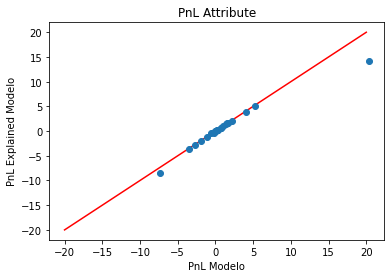

In [14]:
import numpy as np
from matplotlib import pyplot as plt
x = np.linspace(-20, 20, 1000)

plt.plot(x, x, 'r-')
plt.plot(PnL_df['PnL_Modelo'].values, PnL_df['PnL_Modelo_Explained'].values, 'o')
plt.title('PnL Attribute')
plt.xlabel('PnL Modelo')
plt.ylabel('PnL Explained Modelo')

plt.show()

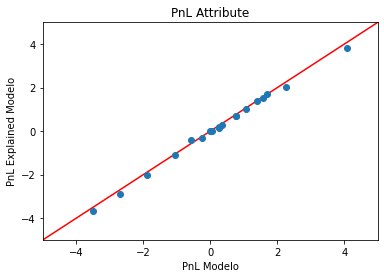

In [15]:
x = np.linspace(-20, 20, 1000)

plt.plot(x, x, 'r-')
plt.plot(PnL_df['PnL_Modelo'].values, PnL_df['PnL_Modelo_Explained'].values, 'o')
plt.title('PnL Attribute')
plt.xlabel('PnL Modelo')
plt.ylabel('PnL Explained Modelo')

plt.xlim(-5,5)
plt.ylim(-5,5)


plt.show()